In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# import data
filename = 'FigS4CD_data.xlsx'
xl = pd.ExcelFile(filename)

# extract timecourse OD600 data
raw_od = xl.parse('figS4CD_data', index_col = None, header = None, skiprows = 61).iloc[:96,:92]

# extract timecourse GFP data 
raw_gfp = xl.parse('figS4CD_data', index_col = None, header = None, skiprows = 162).iloc[:96,:92]

# extract time
time = xl.parse('figS4CD_data', index_col = None, header = None, skiprows = 59).iloc[0,1:92]
time = time/3600

In [3]:
### transform to long form
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

od = raw_od.copy()
od.columns = time_header

# arrays for annotation
atcs = np.tile(np.array([0, 0.01, 0.1, 1, 10, 100]), 16)
atcs_for_log_plotting = np.tile(np.array([0.001, 0.01, 0.1, 1, 10, 100]), 16)
kans = np.tile(np.repeat(np.array([0, 50]), 12),4)
lins = np.tile(np.repeat(np.array([0, 3.2]),24),2)
replicateID = np.tile(np.repeat(np.array([1,2,3,4]), 12),2)

# insert the arrays for annotation
od.insert(1, 'atc', atcs)
od.insert(1, 'atc for log plotting', atcs_for_log_plotting)
od.insert(1, 'kan', kans)
od.insert(1, 'lin', lins)
od.insert(1, 'replicate', replicateID)

# transform to long form
od_long = pd.melt(od, id_vars = ['wellID','atc','atc for log plotting','kan','lin','replicate'], value_name = 'OD600')
od_long.rename(columns = {'variable':'hours'}, inplace = True)
od_long.OD600 = od_long.OD600.astype(float)
od_long.hours = od_long.hours.astype(float)


# do the same thing for the GFP data
temp_header = time.copy()
time_header = pd.concat([pd.Series(['wellID']), temp_header])

gfp = raw_gfp.copy()
gfp.columns = time_header

gfp.insert(1, 'atc', atcs)
gfp.insert(1, 'atc for log plotting', atcs_for_log_plotting)
gfp.insert(1, 'kan', kans)
gfp.insert(1, 'lin', lins)
gfp.insert(1, 'replicate', replicateID)

gfp_long = pd.melt(gfp, id_vars = ['wellID','atc','atc for log plotting','kan','lin','replicate'], value_name = 'GFP')
gfp_long.rename(columns = {'variable':'hours'}, inplace = True)
gfp_long.GFP= gfp_long.GFP.astype(float)
gfp_long.hours = gfp_long.hours.astype(float)


# merge OD and GFP data
final_df =  pd.merge(od_long, gfp_long)

# insert normalized GFP 
norm_gfp = final_df['GFP']/final_df['OD600']
final_df.insert(9, 'Normalized GFP', norm_gfp)
final_df


,wellID,atc,atc for log plotting,kan,lin,replicate,hours,OD600,GFP,Normalized GFP
0,A1,0.00,0.001,0,0.0,1,0.000000,0.0522,12.0,229.885054
1,A2,0.01,0.010,0,0.0,1,0.000000,0.0529,12.0,226.843094
2,A3,0.10,0.100,0,0.0,1,0.000000,0.0524,12.0,229.007632
3,A4,1.00,1.000,0,0.0,1,0.000000,0.0526,13.0,247.148289
4,A5,10.00,10.000,0,0.0,1,0.000000,0.0527,12.0,227.703977
...,...,...,...,...,...,...,...,...,...,...
8731,H8,0.01,0.010,50,3.2,4,15.000306,0.3756,102.0,271.565488
8732,H9,0.10,0.100,50,3.2,4,15.000306,0.3489,82.0,235.024369
8733,H10,1.00,1.000,50,3.2,4,15.000306,0.2946,47.0,159.538352
8734,H11,10.00,10.000,50,3.2,4,15.000306,0.2275,30.0,131.868128


In [4]:
# extract endpoint data (t = 15 hours)
t15df = final_df[final_df['hours']==time.iloc[90]]
t15df

,wellID,atc,atc for log plotting,kan,lin,replicate,hours,OD600,GFP,Normalized GFP
8640,A1,0.00,0.001,0,0.0,1,15.000306,0.3869,146.0,377.358483
8641,A2,0.01,0.010,0,0.0,1,15.000306,0.3733,143.0,383.069931
8642,A3,0.10,0.100,0,0.0,1,15.000306,0.3655,79.0,216.142269
8643,A4,1.00,1.000,0,0.0,1,15.000306,0.3704,30.0,80.993518
8644,A5,10.00,10.000,0,0.0,1,15.000306,0.3560,28.0,78.651684
...,...,...,...,...,...,...,...,...,...,...
8731,H8,0.01,0.010,50,3.2,4,15.000306,0.3756,102.0,271.565488
8732,H9,0.10,0.100,50,3.2,4,15.000306,0.3489,82.0,235.024369
8733,H10,1.00,1.000,50,3.2,4,15.000306,0.2946,47.0,159.538352
8734,H11,10.00,10.000,50,3.2,4,15.000306,0.2275,30.0,131.868128


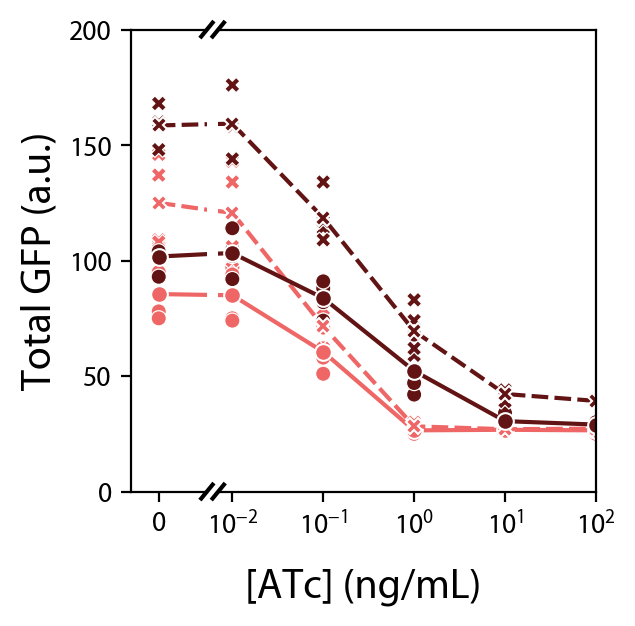

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(3, 3), sharey = False, dpi = 200, width_ratios=[1, 5])
plt.subplots_adjust(
                    wspace=0.05, 
                    )
plt.rcParams['font.sans-serif'] = "Myriad Pro"


sns.lineplot(data = t15df, x = 'atc for log plotting', y = 'GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], errorbar = None)

sns.lineplot(data = t15df, x = 'atc for log plotting', y = 'GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], errorbar = None)

sns.scatterplot(data = t15df, x = 'atc for log plotting', y = 'GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], s = 30, color = ".2")

sns.scatterplot(data = t15df, x = 'atc for log plotting', y = 'GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], s = 30, color = ".2")


axes[0].get_legend().remove()
axes[1].get_legend().remove()

axes[0].set_xlim([0.0004, 0.005])
axes[1].set_xlim([0.007, 101])

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_xticks([0.001])
axes[0].set_xticklabels(['0'])
axes[0].minorticks_off()

axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_yticks([])
axes[1].set_ylabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((1-5*d, 1+5*d), (-d, +d), **kwargs)
axes[0].plot((1-5*d, 1+5*d), (1-d, 1+d), **kwargs)

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1-d, 1+d), **kwargs)
axes[1].plot((-d, +d), (-d, +d), **kwargs)

axes[0].set_ylabel('')
axes[1].set_ylabel('')

axes[0].set_ylabel('Total GFP (a.u.)', fontsize = 15)
axes[0].set_xlabel('')
axes[1].set_xlabel('[ATc] (ng/mL)          ', fontsize = 15, labelpad = 10, ha='center')

axes[0].set_ylim([0, 200])
axes[1].set_ylim([0, 200])
axes[1].set_xticks([1e-2, 1e-1, 1e0, 1e1, 1e2])
axes[0].set_yticks([0, 50, 100, 150, 200])

plt.show()

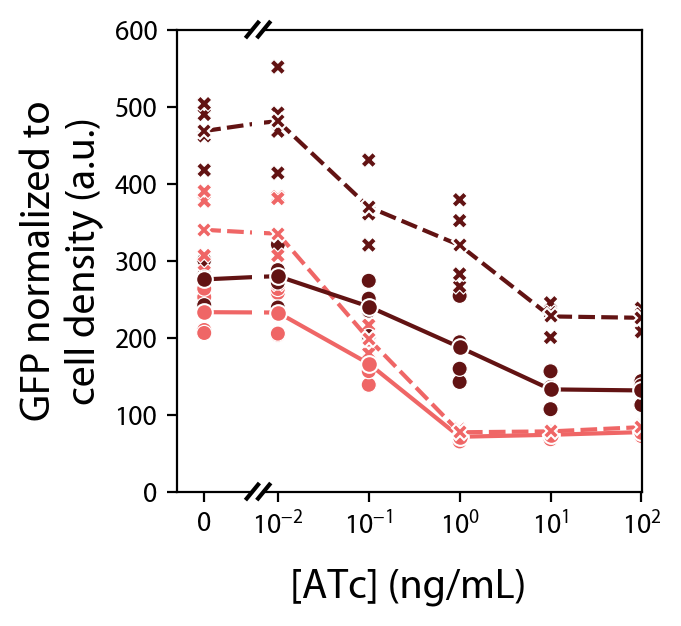

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(3, 3), sharey = False, dpi = 200, width_ratios=[1, 5])
plt.subplots_adjust(
                    wspace=0.05, 
                    )
plt.rcParams['font.sans-serif'] = "Myriad Pro"


sns.lineplot(data = t15df, x = 'atc for log plotting', y = 'Normalized GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], errorbar = None)

sns.lineplot(data = t15df, x = 'atc for log plotting', y = 'Normalized GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], errorbar = None)

sns.scatterplot(data = t15df, x = 'atc for log plotting', y = 'Normalized GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0], palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[0], s = 30, color = ".2")

sns.scatterplot(data = t15df, x = 'atc for log plotting', y = 'Normalized GFP', hue = 'kan', style = 'lin',
             style_order = [3.2, 0],palette=['#EF6666', '#621313'], markers = ['o', 'X'],
             ax = axes[1], s = 30, color = ".2")


axes[0].get_legend().remove()
axes[1].get_legend().remove()

axes[0].set_xlim([0.0004, 0.005])
axes[1].set_xlim([0.007, 101])

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_xticks([0.001])
axes[0].set_xticklabels(['0'])
axes[0].minorticks_off()

axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_yticks([])
axes[1].set_ylabel('')

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, color='k', clip_on=False)
axes[0].plot((1-5*d, 1+5*d), (-d, +d), **kwargs)
axes[0].plot((1-5*d, 1+5*d), (1-d, 1+d), **kwargs)

kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1-d, 1+d), **kwargs)
axes[1].plot((-d, +d), (-d, +d), **kwargs)

axes[0].set_ylabel('')
axes[1].set_ylabel('')

axes[0].set_ylabel('GFP normalized to\ncell density (a.u.)', fontsize = 15)
axes[0].set_xlabel('')
axes[1].set_xlabel('[ATc] (ng/mL)          ', fontsize = 15, labelpad = 10, ha='center')

axes[0].set_ylim([0, 600])
axes[1].set_ylim([0, 600])
axes[1].set_xticks([1e-2, 1e-1, 1e0, 1e1, 1e2])

plt.show()